In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn as sk
import sklearn.datasets as skd
import sklearn.ensemble as ske
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import explained_variance_score,max_error, mean_absolute_error,mean_squared_error,r2_score

%matplotlib inline

In [3]:
explained_variance = []
maxerror = []
meanabserror=[]
meansqerror=[]
r2score = []
featureimportance = []
feature = []
for i in range(1,43): #includes first number, does not include second number
    data = pd.read_csv('runsummary%d.csv' %(i))
    feature_names = np.array(['roll','roll_rate','vehicle_speed','boom_roll','boom_roll_rate'])
    print(data.head())

    Y = data['Total_Error']
    print(Y.shape)
    X = data.iloc[:, 0:5].values
    print(X.shape)
    
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 0)
    
    reg = ske.RandomForestRegressor(n_estimators=1000,random_state = 0)
    
    Y_train = np.ravel(Y_train)
    
    reg.fit(X_train, Y_train)
    
    Y_pred = reg.predict(X_test)
    
    explained_variance.append(explained_variance_score(Y_test,Y_pred))
    
    maxerror.append(max_error(Y_test,Y_pred))
    meanabserror.append(mean_absolute_error(Y_test,Y_pred))
    meansqerror.append(mean_squared_error(Y_test,Y_pred))
    r2score.append(r2_score(Y_test, Y_pred, multioutput='variance_weighted'))
    
    #feat_ind = np.argsort(reg.feature_importances_)[::-1]
    #feat_imp = reg.feature_importances_[np.argsort(reg.feature_importances_)]
    
    #print(reg.feature_importances_[np.argsort(reg.feature_importances_)][::-1]) this prints feature importance in decending order
    print(feature_names) #non-sorted
    print(reg.feature_importances_) #non-sorted
    
    featureimportance.append(reg.feature_importances_)
    feature.append(feature_names)
    
    #featureimportance.append(reg.feature_importances_[np.argsort(reg.feature_importances_)][::-1])
    #feature.append(feature_names[feat_ind])
    
    

   Roll_Angle  Roll_Rate  Vehicle_Speed  Boom_Roll  Boom_Roll_Rate  \
0    3.839203  -0.531250       0.000000  -0.335938            -0.3   
1    3.802765  -0.867188       0.000000  -0.265625            -0.2   
2    3.761566   0.085938       0.000000  -0.203125            -0.2   
3    3.756927   0.953125       4.355469  -0.210938             0.1   
4    3.785645   0.914062       4.355469  -0.210938             0.1   

   Total_Error  
0     0.144180  
1     0.144180  
2     0.104976  
3     0.000000  
4     0.000000  
(1659,)
(1659, 5)
   Roll_Angle  Roll_Rate  Vehicle_Speed  Boom_Roll  Boom_Roll_Rate  \
0   -2.501648  -0.773438       0.000000   2.367188             0.2   
1   -2.537476  -0.093750       4.820312   2.406250             0.3   
2   -2.544464   0.382812       4.820312   2.414062             0.3   
3   -2.541321   0.265625       4.820312   2.414062             0.3   
4   -2.537567   0.390625       4.820312   2.437500             0.4   

   Total_Error  
0     6.494696  
1   

   Roll_Angle  Roll_Rate  Vehicle_Speed  Boom_Roll  Boom_Roll_Rate  \
0    3.319092   0.210938       0.000000    0.03125            -0.1   
1    3.319275   0.234375       0.000000    0.03125            -0.1   
2    3.319733   0.203125       0.000000    0.03125             0.0   
3    3.319061   0.242188       0.000000    0.03125             0.0   
4    3.318176   0.234375       0.011719    0.03125             0.0   

   Total_Error  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0  
(1900,)
(1900, 5)
   Roll_Angle  Roll_Rate  Vehicle_Speed  Boom_Roll  Boom_Roll_Rate  \
0   -3.117218   1.351562       5.242188   1.789062             0.0   
1   -3.090607   0.695312       5.242188   1.781250            -0.2   
2   -3.083282   0.289062       5.242188   1.835938            -0.2   
3   -3.078918   0.804688       5.242188   1.882812            -0.2   
4   -3.055145   0.859375       5.242188   1.890625            -0.1   

   Total_Error  
0     3.006020  
1   

   Roll_Angle  Roll_Rate  Vehicle_Speed  Boom_Roll  Boom_Roll_Rate  \
0    3.419678  -0.320312       0.000000  -0.367188             0.2   
1    3.395325  -0.265625       5.636719  -0.343750             0.2   
2    3.385193   0.523438       5.636719  -0.359375             0.2   
3    3.397430   0.296875       5.636719  -0.367188             0.2   
4    3.388306  -0.343750       5.636719  -0.351562             0.2   

   Total_Error  
0     0.084232  
1     0.055400  
2     0.052616  
3     0.055400  
4     0.053000  
(1656,)
(1656, 5)
   Roll_Angle  Roll_Rate  Vehicle_Speed  Boom_Roll  Boom_Roll_Rate  \
0   -2.965607   0.148438       0.000000   1.398438             0.0   
1   -2.960083   0.882812       0.000000   1.359375             0.0   
2   -2.933441   0.812500       0.000000   1.320312             0.0   
3   -2.915070   0.289062       6.898438   1.343750            -0.1   
4   -2.927490  -0.226562       6.898438   1.421875            -0.1   

   Total_Error  
0     5.681128  
1   

In [4]:
df = pd.DataFrame(explained_variance, columns = ['Explained Variance'])

In [5]:
df['Mean Absolute Error'] = meanabserror
df['Mean Squared Error'] = meansqerror
df['R2 Score'] = r2score
df['Max Error'] = maxerror
df.head(10)

,Explained Variance,Mean Absolute Error,Mean Squared Error,R2 Score,Max Error
0,0.855246,0.263793,0.295876,0.855220,5.447236
1,0.855504,0.356015,0.315116,0.855351,3.030811
2,0.872811,0.377196,0.488597,0.872223,5.781260
3,0.939948,0.282598,0.153453,0.939930,1.905106
4,0.750920,0.422626,0.798920,0.750914,8.212165
5,0.825335,0.420755,0.506034,0.823385,3.614782
6,0.914752,0.229448,0.141775,0.914312,2.101999
7,0.880180,0.274733,0.189590,0.879070,2.771491
8,0.953473,0.380730,0.437763,0.953419,4.663610
9,0.957591,0.413627,0.511820,0.957452,5.514212


In [6]:
blah = df.mean()
blah

Explained Variance     0.901734
Mean Absolute Error    0.352946
Mean Squared Error     0.532129
R2 Score               0.901375
Max Error              5.229514
dtype: float64

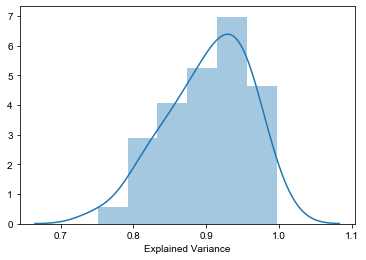

In [7]:
sns.distplot(df['Explained Variance'])
plt.style.use('seaborn-whitegrid')

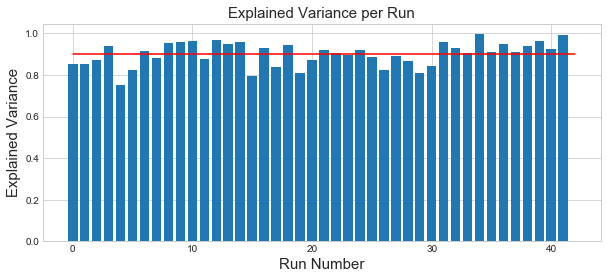

In [8]:
plt.figure(figsize=(10,4))
plt.style.use('seaborn-whitegrid')
plt.bar(df.index,df['Explained Variance'])
plt.plot([0,42],[df.mean()[0],df.mean()[0]],'r-')
plt.title('Explained Variance per Run',fontsize=15)
plt.xlabel('Run Number',fontsize=15)
plt.ylabel('Explained Variance',fontsize=15)
plt.savefig('pictures/ExplainedVariancePerRun.png')

In [11]:
featureimportance

[array([0.1822569 , 0.01657767, 0.1551929 , 0.54017612, 0.10579641]),
 array([0.31049174, 0.03927447, 0.20992181, 0.32635501, 0.11395696]),
 array([0.15276972, 0.02957241, 0.24996341, 0.46567632, 0.10201814]),
 array([0.19752941, 0.03149721, 0.08465402, 0.61341242, 0.07290694]),
 array([0.25758195, 0.05550509, 0.17320055, 0.37181347, 0.14189894]),
 array([0.18645284, 0.04236421, 0.30264144, 0.39536683, 0.07317468]),
 array([0.26213361, 0.02175357, 0.1169086 , 0.50520886, 0.09399537]),
 array([0.2025763 , 0.03467215, 0.1471655 , 0.47920372, 0.13638232]),
 array([0.12664432, 0.00562842, 0.0360711 , 0.81003741, 0.02161875]),
 array([0.09157215, 0.01588821, 0.36543031, 0.43991384, 0.08719549]),
 array([0.09321521, 0.01966354, 0.26011157, 0.46364306, 0.16336661]),
 array([0.25312448, 0.02537855, 0.17909376, 0.41070195, 0.13170126]),
 array([0.06171283, 0.01710259, 0.72714711, 0.16743074, 0.02660673]),
 array([0.20005998, 0.01338731, 0.25907152, 0.43847099, 0.0890102 ]),
 array([0.06033274, 

In [10]:
feature

[array(['roll', 'roll_rate', 'vehicle_speed', 'boom_roll',
        'boom_roll_rate'], dtype='<U14'),
 array(['roll', 'roll_rate', 'vehicle_speed', 'boom_roll',
        'boom_roll_rate'], dtype='<U14'),
 array(['roll', 'roll_rate', 'vehicle_speed', 'boom_roll',
        'boom_roll_rate'], dtype='<U14'),
 array(['roll', 'roll_rate', 'vehicle_speed', 'boom_roll',
        'boom_roll_rate'], dtype='<U14'),
 array(['roll', 'roll_rate', 'vehicle_speed', 'boom_roll',
        'boom_roll_rate'], dtype='<U14'),
 array(['roll', 'roll_rate', 'vehicle_speed', 'boom_roll',
        'boom_roll_rate'], dtype='<U14'),
 array(['roll', 'roll_rate', 'vehicle_speed', 'boom_roll',
        'boom_roll_rate'], dtype='<U14'),
 array(['roll', 'roll_rate', 'vehicle_speed', 'boom_roll',
        'boom_roll_rate'], dtype='<U14'),
 array(['roll', 'roll_rate', 'vehicle_speed', 'boom_roll',
        'boom_roll_rate'], dtype='<U14'),
 array(['roll', 'roll_rate', 'vehicle_speed', 'boom_roll',
        'boom_roll_rate'], dtype

In [46]:
featuredf = pd.DataFrame(feature, columns = ['Feature 1','Feature 2','Feature 3',
                                             'Feature 4','Feature 5'])
featuredf.head()

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5
0,roll,roll_rate,vehicle_speed,boom_roll,boom_roll_rate
1,roll,roll_rate,vehicle_speed,boom_roll,boom_roll_rate
2,roll,roll_rate,vehicle_speed,boom_roll,boom_roll_rate
3,roll,roll_rate,vehicle_speed,boom_roll,boom_roll_rate
4,roll,roll_rate,vehicle_speed,boom_roll,boom_roll_rate


In [23]:
summarytable = pd.DataFrame(featureimportance, columns = ['Feature 1 Score','Feature 2 Score','Feature 3 Score',
                                                         'Feature 4 Score','Feature 5 Score'])

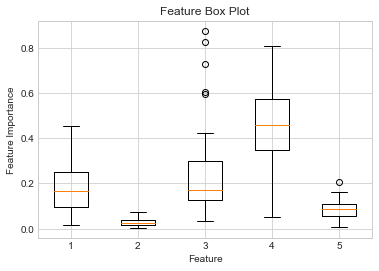

In [24]:
import matplotlib.pyplot as plt

value1= summarytable['Feature 1 Score']
value2= summarytable['Feature 2 Score']
value3= summarytable['Feature 3 Score']
value4= summarytable['Feature 4 Score']
value5= summarytable['Feature 5 Score']
plt.style.use('seaborn-whitegrid')
plt.title('Feature Box Plot')
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
box_plot_data=[value1,value2,value3,value4,value5]
plt.boxplot(box_plot_data)
plt.show()


In [25]:
summarytable['Feature 1'] = featuredf['Feature 1']
summarytable['Feature 2'] = featuredf['Feature 2']
summarytable['Feature 3'] = featuredf['Feature 3']
summarytable['Feature 4'] = featuredf['Feature 4']
summarytable['Feature 5'] = featuredf['Feature 5']

In [26]:
summarytable.head(10)

,Feature 1 Score,Feature 2 Score,Feature 3 Score,Feature 4 Score,Feature 5 Score,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5
0,0.182257,0.016578,0.155193,0.540176,0.105796,roll,roll_rate,vehicle_speed,boom_roll,boom_roll_rate
1,0.310492,0.039274,0.209922,0.326355,0.113957,roll,roll_rate,vehicle_speed,boom_roll,boom_roll_rate
2,0.152770,0.029572,0.249963,0.465676,0.102018,roll,roll_rate,vehicle_speed,boom_roll,boom_roll_rate
3,0.197529,0.031497,0.084654,0.613412,0.072907,roll,roll_rate,vehicle_speed,boom_roll,boom_roll_rate
4,0.257582,0.055505,0.173201,0.371813,0.141899,roll,roll_rate,vehicle_speed,boom_roll,boom_roll_rate
5,0.186453,0.042364,0.302641,0.395367,0.073175,roll,roll_rate,vehicle_speed,boom_roll,boom_roll_rate
6,0.262134,0.021754,0.116909,0.505209,0.093995,roll,roll_rate,vehicle_speed,boom_roll,boom_roll_rate
7,0.202576,0.034672,0.147166,0.479204,0.136382,roll,roll_rate,vehicle_speed,boom_roll,boom_roll_rate
8,0.126644,0.005628,0.036071,0.810037,0.021619,roll,roll_rate,vehicle_speed,boom_roll,boom_roll_rate
9,0.091572,0.015888,0.365430,0.439914,0.087195,roll,roll_rate,vehicle_speed,boom_roll,boom_roll_rate


In [27]:
summarytable.describe()

,Feature 1 Score,Feature 2 Score,Feature 3 Score,Feature 4 Score,Feature 5 Score
count,42.000000,42.000000,42.000000,42.000000,42.000000
mean,0.181209,0.027306,0.251973,0.452997,0.086516
std,0.106115,0.016490,0.203713,0.198706,0.047290
min,0.018405,0.001163,0.036071,0.050142,0.006053
25%,0.094194,0.014787,0.127794,0.347285,0.057931
50%,0.165219,0.023566,0.173219,0.458536,0.088103
75%,0.252835,0.038991,0.298370,0.574124,0.107472
max,0.454861,0.072632,0.875505,0.810037,0.205439


Text(0.5, 1.0, 'Feature 1 (Roll) Feature Importance Distribution')

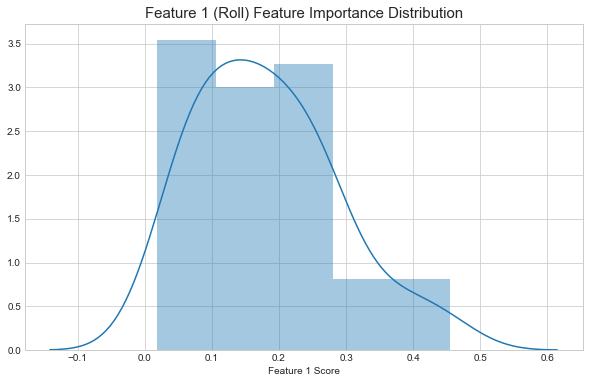

In [29]:
import seaborn as sns
plt.figure(figsize=(10,6))
plt.style.use('seaborn-whitegrid')
sns.distplot(summarytable['Feature 1 Score'])
plt.title('Feature 1 (Roll) Feature Importance Distribution',fontsize=15)

Text(0.5, 1.0, 'Feature 2 (Roll Rate) Feature Importance Distribution')

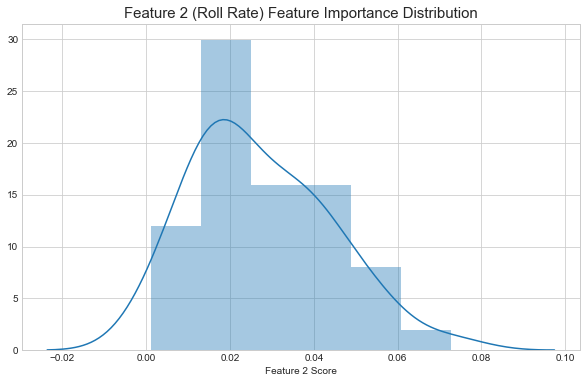

In [30]:
plt.figure(figsize=(10,6))
plt.style.use('seaborn-whitegrid')
sns.distplot(summarytable['Feature 2 Score'])
plt.title('Feature 2 (Roll Rate) Feature Importance Distribution',fontsize=15)

Text(0.5, 1.0, 'Feature 3 (Vehicle Speed) Feature Importance Distribution')

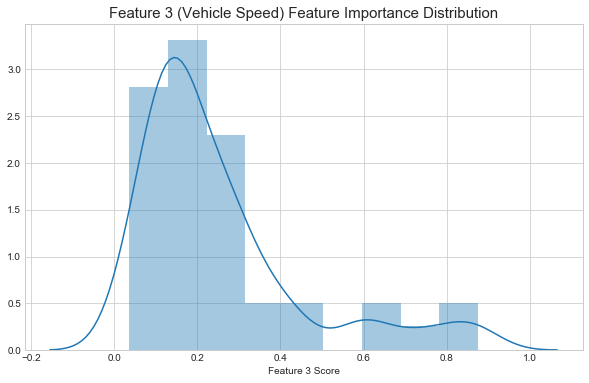

In [31]:
plt.figure(figsize=(10,6))
plt.style.use('seaborn-whitegrid')
sns.distplot(summarytable['Feature 3 Score'])
plt.title('Feature 3 (Vehicle Speed) Feature Importance Distribution',fontsize=15)

Text(0.5, 1.0, 'Feature 4 (Boom Roll) Feature Importance Distribution')

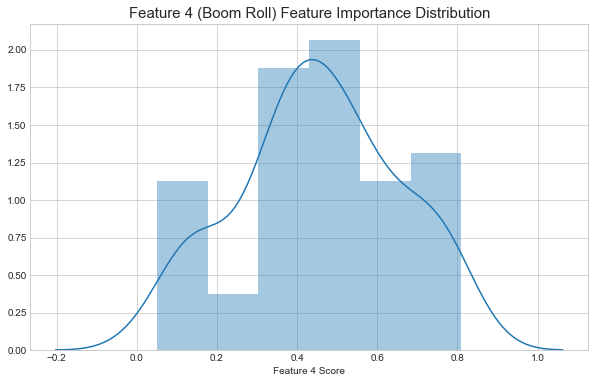

In [32]:
plt.figure(figsize=(10,6))
plt.style.use('seaborn-whitegrid')
sns.distplot(summarytable['Feature 4 Score'])
plt.title('Feature 4 (Boom Roll) Feature Importance Distribution',fontsize=15)

Text(0.5, 1.0, 'Feature 5 (Boom Roll Rate) Feature Importance Distribution')

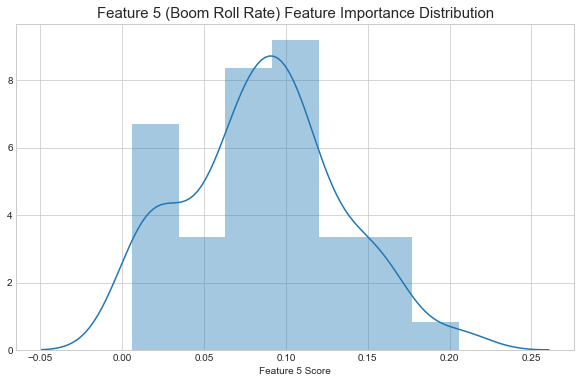

In [33]:
plt.figure(figsize=(10,6))
plt.style.use('seaborn-whitegrid')
sns.distplot(summarytable['Feature 5 Score'])
plt.title('Feature 5 (Boom Roll Rate) Feature Importance Distribution',fontsize=15)

In [35]:
ave = summarytable.mean(axis=0)

In [36]:
ave = ave.round(5)
ave

Feature 1 Score    0.18121
Feature 2 Score    0.02731
Feature 3 Score    0.25197
Feature 4 Score    0.45300
Feature 5 Score    0.08652
dtype: float64

In [37]:
std = summarytable.std(axis=0)
std

Feature 1 Score    0.106115
Feature 2 Score    0.016490
Feature 3 Score    0.203713
Feature 4 Score    0.198706
Feature 5 Score    0.047290
dtype: float64

In [38]:
ave1 = ave[0]
ave2 = ave[1]
ave3 = ave[2]
ave4 = ave[3]
ave5 = ave[4]

Text(3.95, 0.05, '0.08652')

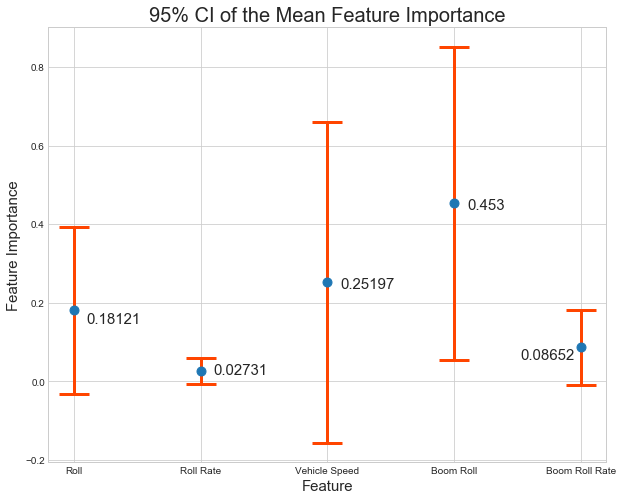

In [39]:
fig, ax = plt.subplots(figsize=(10, 8))
names = ['Roll','Roll Rate','Vehicle Speed','Boom Roll','Boom Roll Rate']
ax.errorbar(names,ave, yerr=std*2, fmt='o', ecolor='orangered',capsize=15,capthick=3,markersize=9,lw=3)
plt.style.use('seaborn-whitegrid')
ax.set_title('95% CI of the Mean Feature Importance', fontsize=20)
ax.set_xlabel('Feature', fontsize=15)
ax.set_ylabel('Feature Importance', fontsize=15)
ax.annotate(ave1, xy=(['Roll'], ave1), xycoords='data',ha='left', va='bottom',xytext=(.1, .14),fontsize=15)
ax.annotate(ave2, xy=(['Roll Rate'], ave2), xycoords='data',ha='left', va='bottom',xytext=(1.1, .01),fontsize=15)
ax.annotate(ave3, xy=(['Vehicle Speed'], ave3), xycoords='data',ha='left', va='bottom',xytext=(2.1, .23),fontsize=15)
ax.annotate(ave4, xy=(['Boom Roll'], ave4), xycoords='data',ha='left', va='bottom',xytext=(3.1, .43),fontsize=15)
ax.annotate(ave5, xy=(['Boom Roll Rate'], ave5), xycoords='data',ha='right', va='bottom',xytext=(3.95, .05),fontsize=15)

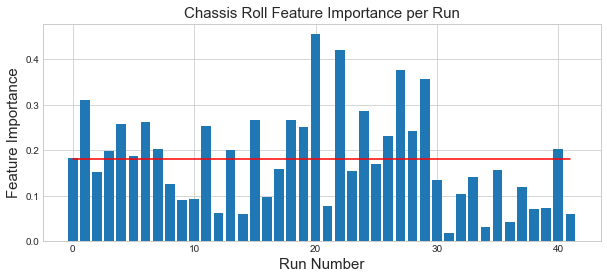

In [40]:
plt.figure(figsize=(10,4))
plt.style.use('seaborn-whitegrid')
plt.bar(summarytable.index,summarytable['Feature 1 Score'])
plt.plot([0,41],[ave[0],ave[0]],'r-')
plt.title('Chassis Roll Feature Importance per Run',fontsize=15)
plt.xlabel('Run Number',fontsize=15)
plt.ylabel('Feature Importance',fontsize=15)
plt.savefig('pictures/ChassisRollFeatureImportancePerRun.png')

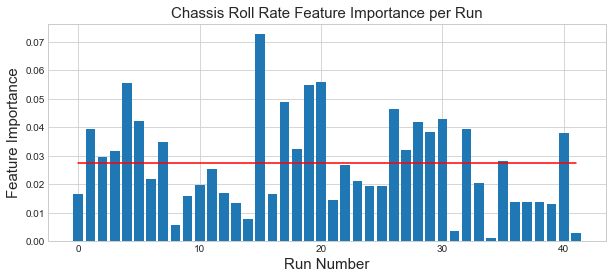

In [41]:
plt.figure(figsize=(10,4))
plt.style.use('seaborn-whitegrid')
plt.bar(summarytable.index,summarytable['Feature 2 Score'])
plt.plot([0,41],[ave[1],ave[1]],'r-')
plt.title('Chassis Roll Rate Feature Importance per Run',fontsize=15)
plt.xlabel('Run Number',fontsize=15)
plt.ylabel('Feature Importance',fontsize=15)
plt.savefig('pictures/ChassisRollRateFeatureImportancePerRun.png')

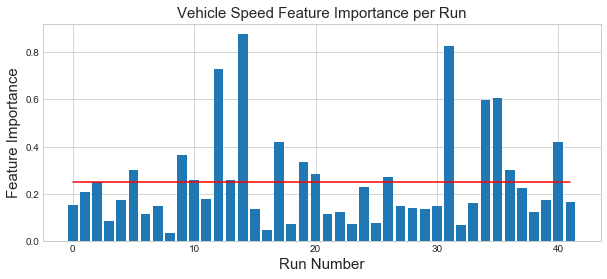

In [42]:
plt.figure(figsize=(10,4))
plt.style.use('seaborn-whitegrid')
plt.bar(summarytable.index,summarytable['Feature 3 Score'])
plt.plot([0,41],[ave[2],ave[2]],'r-')
plt.title('Vehicle Speed Feature Importance per Run',fontsize=15)
plt.xlabel('Run Number',fontsize=15)
plt.ylabel('Feature Importance',fontsize=15)
plt.savefig('pictures/VehicleSpeedFeatureImportancePerRun.png')

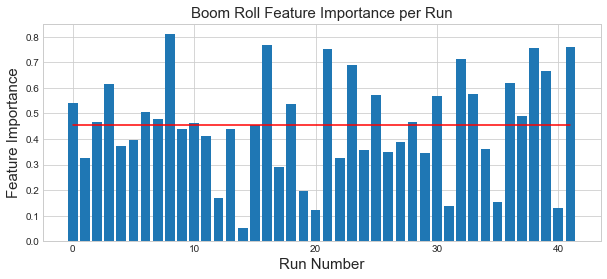

In [43]:
plt.figure(figsize=(10,4))
plt.style.use('seaborn-whitegrid')
plt.bar(summarytable.index,summarytable['Feature 4 Score'])
plt.plot([0,41],[ave[3],ave[3]],'r-')
plt.title('Boom Roll Feature Importance per Run',fontsize=15)
plt.xlabel('Run Number',fontsize=15)
plt.ylabel('Feature Importance',fontsize=15)
plt.savefig('pictures/BoomRollFeatureImportancePerRun.png')

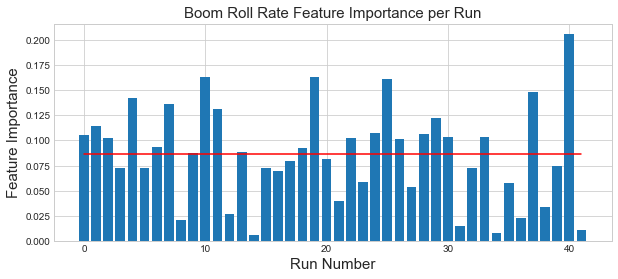

In [44]:
plt.figure(figsize=(10,4))
plt.style.use('seaborn-whitegrid')
plt.bar(summarytable.index,summarytable['Feature 5 Score'])
plt.plot([0,41],[ave[4],ave[4]],'r-')
plt.title('Boom Roll Rate Feature Importance per Run',fontsize=15)
plt.xlabel('Run Number',fontsize=15)
plt.ylabel('Feature Importance',fontsize=15)
plt.savefig('pictures/BoomRollRateFeatureImportancePerRun.png')

In [45]:
from sklearn import tree
reg.estimators_[0]
tree.export_graphviz(reg.estimators_[0], 'tree.dot')
tree.export_graphviz(reg.estimators_[5], 'tree.dot', feature_names = feature_names, rounded = True, precision = 1)